<h1>Содержание проекта:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ рынка компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Задача:** выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Проверить гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Данные:** из открытых источников до 2016 года. 
(Представим, что сейчас декабрь 2016 г. и планируется рекламная кампания на 2017-й.)



**Описание данных (games.csv)**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Предобработка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# сохраняем прочитанные из файла данные в df
df = pd.read_csv('/datasets/games.csv')

In [3]:
# ознакомление с данными из датафрейма
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру

In [4]:
df = df.rename(str.lower, axis = 'columns')

In [5]:
# проверим, как прошло переименование столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# смотрим, сколько всего записей содержится в датафрейме
df.shape[0]

16715

In [8]:
# суммарное количество дубликатов в таблице df
df.duplicated().sum()

0

Таблица состоит из 10 столбцов. Общее количество записей - 16715. Есть столбцы, в которых количество записей меньше, что говорит пропуске данных. Полные дубликаты отсутствуют.

In [9]:
# проверим, сколько пропусков в каждом столбце
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Столбцы genre и name**

Пропусков в столбцах name и genre всего по два. Удаление такого количества записей не повлияет на дальнейший анализ данных.

In [10]:
# удаляем записи с пропусками в столбцах 'name' и 'genre'
df = df.dropna(subset=['name', 'genre'])

In [11]:
df.shape[0]

16713

После того, как мы удалили строки с незаполненными значениями в столбцах с названием игр и названием жанров, датасет сократился всего на две строки, значит, пустые значения были в одних и тех же строках.

**Столбец year_of_release**

In [12]:
# посмотрим на названия игр
print(df.loc[df['year_of_release'].isna(), 'name'].unique())

['Madden NFL 2004' 'FIFA Soccer 2004' 'LEGO Batman: The Videogame'
 'wwe Smackdown vs. Raw 2006' 'Space Invaders' 'Rock Band'
 "Frogger's Adventures: Temple of the Frog"
 'LEGO Indiana Jones: The Original Adventures' 'Call of Duty 3'
 'Call of Duty: Black Ops' 'Triple Play 99' 'Adventure' 'Combat'
 'LEGO Harry Potter: Years 5-7' 'NASCAR Thunder 2003'
 'Hitman 2: Silent Assassin' 'Legacy of Kain: Soul Reaver'
 'Donkey Kong Land III' 'Air-Sea Battle' 'Suikoden III' 'Wheel of Fortune'
 'Yakuza 4' 'Namco Museum' 'Rhythm Heaven'
 'The Lord of the Rings: War in the North' 'Madden NFL 07'
 'MLB SlugFest 20-03' 'Shaun White Snowboarding'
 'PES 2009: Pro Evolution Soccer' 'WarioWare: Twisted!' 'Madden NFL 11'
 'Test Drive Unlimited 2'
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe'
 'Monster Hunter 2' 'Metal Gear Solid 2: Substance'
 'Advance Wars: Days of Ruin' 'The Golden Compass' 'Madden NFL 06'
 'NASCAR: Dirt to Daytona' 'Madden NFL 2002' 'Def Jam: Fight for NY'
 'NBA Stre

Есть поля, в которых пропущен год релиза. Если посмотреть на названия игр, в которых встречаются эти пропуски, можно увидеть, что в ряде случаев год указан в самом названии. Но, чтобы убедиться совпадает ли год в названии с годом выхода игры, обратимся к открытым данным в интернете.  

Из открытых данных на примере нескольких игр ('Madden NFL 2004', 'FIFA Soccer 2004, 'NASCAR Thunder 2003') видим, что в названии игр указывается год, следующий за годом выпуска игры. На основе этих данных заполним пропуски в поле year_of_release там, где это возможно. Остальные строки с пропущенным годом удалим. Таких строк всего 245, что составляет менее 1,5% от всех данных. Удаление не должно привести к искажению результатов исследования.

In [13]:
# заполняем пропуски на основе года, прописанного в названии игр
df.loc[df['name'] == 'Madden NFL 2004', 'year_of_release'] = 2003
df.loc[df['name'] == 'FIFA Soccer 2004', 'year_of_release'] = 2003
df.loc[df['name'] == 'wwe Smackdown vs. Raw 2006', 'year_of_release'] = 2005
df.loc[df['name'] == 'Triple Play 99', 'year_of_release'] = 1998
df.loc[df['name'] == 'NASCAR Thunder 2003', 'year_of_release'] = 2002
df.loc[df['name'] == 'Madden NFL 07', 'year_of_release'] = 2006
df.loc[df['name'] == 'MLB SlugFest 20-03', 'year_of_release'] = 2002
df.loc[df['name'] == 'PES 2009: Pro Evolution Soccer', 'year_of_release'] = 2008
df.loc[df['name'] == 'Madden NFL 11', 'year_of_release'] = 2010
df.loc[df['name'] == 'Madden NFL 06', 'year_of_release'] = 2005
df.loc[df['name'] == 'Madden NFL 2002', 'year_of_release'] = 2001 
df.loc[df['name'] == 'Tiger Woods PGA Tour 07', 'year_of_release'] = 2006 
df.loc[df['name'] == 'NFL GameDay 2003', 'year_of_release'] = 2002
df.loc[df['name'] == 'NBA Live 2003', 'year_of_release'] = 2002
df.loc[df['name'] == 'Tomb Raider (2013)', 'year_of_release'] = 2012
df.loc[df['name'] == 'All-Star Baseball 2005', 'year_of_release'] = 2004
df.loc[df['name'] == 'Drake of the 99 Dragons', 'year_of_release'] = 1998
df.loc[df['name'] == 'Tour de France 2011', 'year_of_release'] = 2010
df.loc[df['name'] == 'Sega Rally 2006', 'year_of_release'] = 2005
df.loc[df['name'] == 'PDC World Championship Darts 2008', 'year_of_release'] = 2007
df.loc[df['name'] == 'Football Manager 2007', 'year_of_release'] = 2006

In [14]:
# удаляем записи с пропусками в столбце 'year_of_release'
df = df.dropna(subset=['year_of_release'])

In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8467
user_score         6611
rating             6683
dtype: int64

Больше нет пропусков по годам, но данные в колонке 'year_of_release' имеют вещественный тип. Год не принято записывать в виде дробного числа, поэтому выполним преобразование в тип integer

In [16]:
df['year_of_release'] = df['year_of_release'].astype('int')

**Столбец user_score**

In [17]:
df['user_score'].value_counts()

tbd    2378
7.8     322
8       285
8.2     278
8.3     252
       ... 
1         2
0.7       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Помимо числовых значений, в столбце 'user_score' встречается более 2 тыс. значений 'tbd'.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Т.е. в 2378 строках с пометкой 'tbd' в оценке пользователей данные пропущены, но в дальнейшем планируется их заполнение. Следовательно, мы можем заменить их на Nan.

In [18]:
df = df.replace('tbd', np.nan)

In [19]:
# проверим, как выполнилась операция по замене значений 'tbd' в столбце 'user_score'
df.loc[df['user_score'] == 'tbd']['name'].count()

0

In [20]:
# в 'user_score' больше не содержится строковых значений, выполним приведение к вещественному типу данных float
df['user_score'] = df['user_score'].astype('float')

In [21]:
# прооверка типов данных по столбцам
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Столбец rating**

Колонка rating - рейтинг от организации ESRB с определением возрастной категории («EC» — «Для детей младшего возраста», «E»  — «Для всех», «E10+» — «Для всех от 10 лет и старше», «T» — «Подросткам», «M» — «Для взрослых», «AO» — «Только для взрослых», «RP» — «Рейтинг ожидается»).

В поле 'rating' также достаточно большое количество пропусков. У нас нет данных, на основе которых мы могли бы заполнить эти пропуски. Заполним их значением 'unknown'

In [22]:
# заполнение пропусков в столбце rating
df['rating'] = df['rating'].fillna('unknown')

In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8467
user_score         8989
rating                0
dtype: int64

**Столбец critic_score**

В столбцах critic_score и user_score содержится примерно одинаковое количество пропусков. Возможной причиной может быть то, что оценки критиков и игроков по некоторым играм пока не успели загрузить. Заполним пропуски в этих столбцах каким-либо значением, которое в дальнейшем сможем легко отфильтровать. Например, отрицательным значением "-1".

In [24]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [25]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Посчитаем суммарные продажи по всем регионам и запишем их в отдельный столбец 'total_sales'

In [26]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


На этапе предобработки данных мы выявили наличие пропусков в 6 столбцах. Небольшое количество записей с пропусками было удалено. Частично были заполнены пропуски по пропущенным годам данными полученными из названий игр. Достаточно большое количество пропусков было выявлено в столбцах с оценками критиков и пользователей (почти 50%) и в столбце с рейтингом. Пропущенные оценки были заменены на значение "-1" для более легкой фильтрации при дальнейшем анализе. Заполнение пропусков рейтинга (возрастного ограничения) было выполнено значением 'unknown'.

Также были скорректированы названия столбцов путем изменения регистра и добавлен новый столбец с суммой продаж игр по регионам. По нескольким столбцам было выполнено приведение к более удобным для дальнейших рассчетов типам данных.



## Исследовательский анализ данных

**Выпуск игр по годам**

In [28]:
games_by_year = df.groupby('year_of_release', as_index=False)['name'].count().rename(columns={'name': 'games_count'})

In [29]:
games_by_year

,year_of_release,games_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Построим диаграмму распределения количества выпущенных игр по годам.

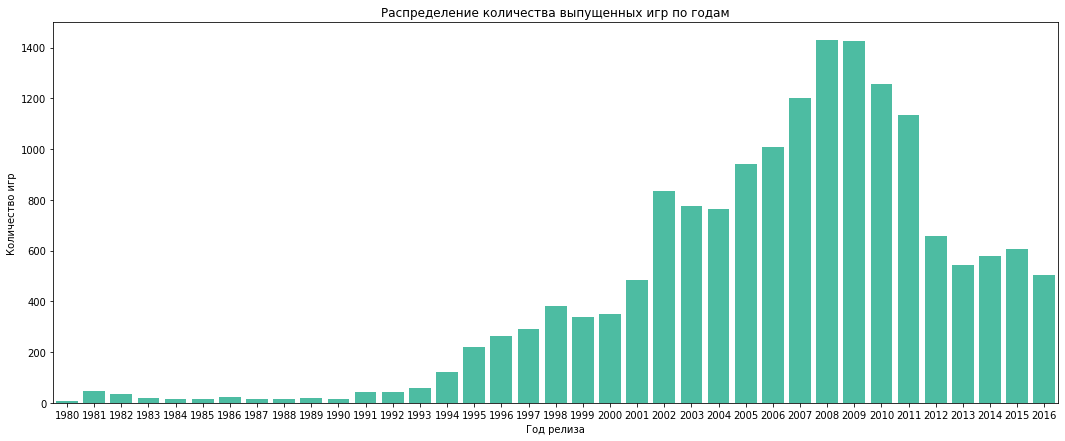

In [30]:
# построение графика

plt.figure(figsize=(18,7))
ax = sns.barplot(x='year_of_release', y='games_count', data=games_by_year, color='#3acfac')
ax.set_xlabel('Год релиза')
ax.set_ylabel('Количество игр')
plt.title('Распределение количества выпущенных игр по годам')
plt.show()

По графику мы видим, что наибольшее количество игр было выпущено в 2008-2009 годах. Потом количество выпущенных игр пошло на спад. Возможно, это связано с широким распространением смартфонов и планшетов, многие стали играть в игры, разработанные под мобильные устройства.

**Изменение продаж по платформам**

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [31]:
# группируем данные по платформам и считаем суммарные продажи
rating_top = df.groupby('platform', as_index=False)['total_sales'].\
sum().sort_values(by='total_sales', ascending=False)

rating_top

,platform,total_sales
16,PS2,1248.12
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,802.79
15,PS,729.04
18,PS4,314.14
6,GBA,312.88
19,PSP,291.18
2,3DS,257.81


Из полученных данных видим, что среди всех платформ по суммарным продажам с большим отрывом от остальных выделяются шесть платформ: PS2, X360, PS3, Wii, DS, PS. Посмотрим на распределение продаж по этим платформам.

In [32]:
# формируем список платформ с самыми большими продажами
platform_rating_top = rating_top[0:6]['platform']
platform_rating_top

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
Name: platform, dtype: object

In [33]:
# получаем глобальные продажи по годам для платформ из списка platform_rating_top
platform_rating = df.query('platform in @platform_rating_top').\
groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].\
sum().sort_values(by='total_sales', ascending=False)

In [34]:
platform_rating

,platform,year_of_release,total_sales
25,PS2,2004,212.13
23,PS2,2002,207.84
47,Wii,2009,206.52
24,PS2,2003,193.05
46,Wii,2008,171.53
...,...,...,...
66,X360,2016,1.52
53,Wii,2015,1.14
32,PS2,2011,0.45
54,Wii,2016,0.18


Строим график распределения по годам для шести платформ с наибольшими суммарными продажами

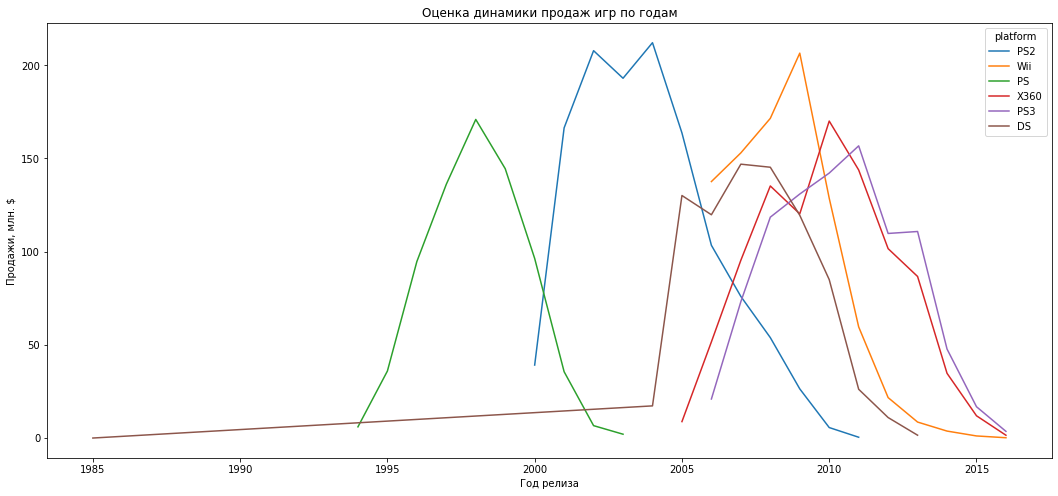

In [35]:
# размер фигуры
plt.figure(figsize=(18, 8))

# параметры графика
sns.lineplot(x=platform_rating.year_of_release,
             y=platform_rating.total_sales,
             hue=platform_rating.platform)

# подписываем оси x и у на графике
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн. $')
plt.title('Оценка динамики продаж игр по годам')
plt.show()

In [36]:
# время жизни платформ
platform_lifetime =  df.groupby('platform')['year_of_release'].max() - df.groupby('platform')['year_of_release'].min()

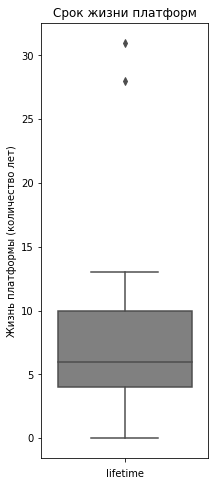

In [37]:
plt.figure(figsize=(3, 8))

# построение и оформление графика 
ax = sns.boxplot(y=platform_lifetime, color='grey')

# подписи осей и  название графика
ax.set_title('Срок жизни платформ')
ax.set_xlabel('lifetime')
ax.set_ylabel('Жизнь платформы (количество лет)')

plt.show()

In [38]:
# смотрим основные статистики продолжительности жизненного цикла платформ
platform_lifetime.describe()

count    31.000000
mean      7.741935
std       6.971216
min       0.000000
25%       4.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

По графику видно, что присутствуют два выброса, в остальном, большая часть данных помещается внутрь межквартильного размаха. Из-за наличия выбросов будем использовать медианное значение срока жизни платформ (6 лет)

**Выбираем актуальный период для анализа данных**

Анализировать данные за всю историю существования игровых платформ по имеющемуся датасету не имеет смысла, т.к. многие из них уже давно перестали существовать. Для того, чтобы строить дальнейшие прогнозы и планировать рекламные кампании, нужно рассматривать актуальные платформы и брать в рассчет данные за временной период, который позволит нам выявить актуальные тенденции в продажах. 

Медианное значение срока жизни платформы, как было определено ранее, составляет 6 лет. Возьмем период на один год меньше этого значения, чтобы было больше шансов рассматривать платформы которые еще не завершили цикл своего сущестования. Таким образом, в нашу выборку попадут как платформы на пике популярности, так и новые зарождающиеся платформы, которые будут популярны в будущем.

In [39]:
# группировка данных платформ за последние 5 лет по годам и платформам и подсчет суммарных мировых продаж
platform_rating_6years = df.query('year_of_release >= 2012').\
groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].\
sum().sort_values(by='total_sales', ascending=False)

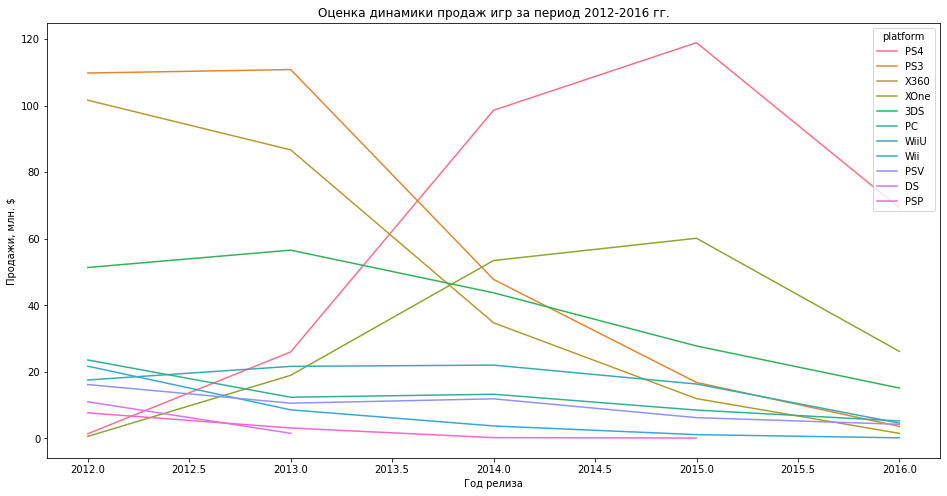

In [40]:
# размер фигуры
plt.figure(figsize=(16, 8))

# параметры графика
sns.lineplot(x=platform_rating_6years.year_of_release,
             y=platform_rating_6years.total_sales,
             hue=platform_rating_6years.platform)

# подписываем оси x и у на графике
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн. $')
plt.title('Оценка динамики продаж игр за период 2012-2016 гг.')
plt.show()

С помощью полученного графика мы можем сделать вывод, что на данный момент по-прежнему перспективными являются только две платформы: PS4 и XOne. Остатки популярности имеются у 3DS. Продажи игр на остальных платфорах незначительны или стремятся к нулю. Поэтому на данном этапе исследования продолжим работать именно с этими тремя платформами: PS4, XOne, 3DS.

**Дальнейшее исследование платформ PS4, XOne, 3DS**

Сделаем срез датафрейма с данными за последние 5 лет для трех выбранных платформ.

In [41]:
# список трех наиболее прибыльных и актуальных платформ
popular_platforms = ['PS4', 'XOne', '3DS']

# делаем выборку по названию платформ и году
df_popular_pl = df.query('platform in @popular_platforms & year_of_release >= 2012').reset_index(drop=True)

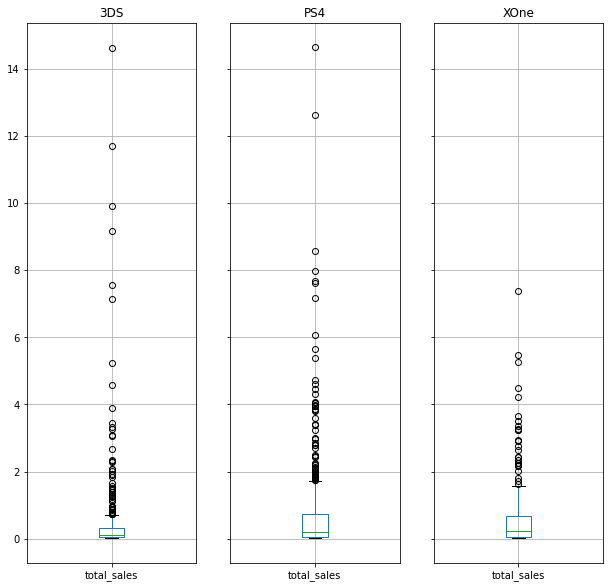

In [42]:
# построение графика боксплот (глобальные продажи с разбивкой по платформам)

df_popular_pl.groupby(['platform']).boxplot(column='total_sales', figsize=(10, 10), layout=(1, 3))

plt.show()

In [43]:
df_popular_pl.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


По графику мы видим, что средние значения для всех платформ примерно одинаковые. Следует также отметить, что на графиках всех платформ присутствует большое количество выбросов. Основную же выручку приносят небольшое количество популярных игр. 

**Рассмотрим влияние отзывов пользователей и критиков на продажи внутри одной платформы**

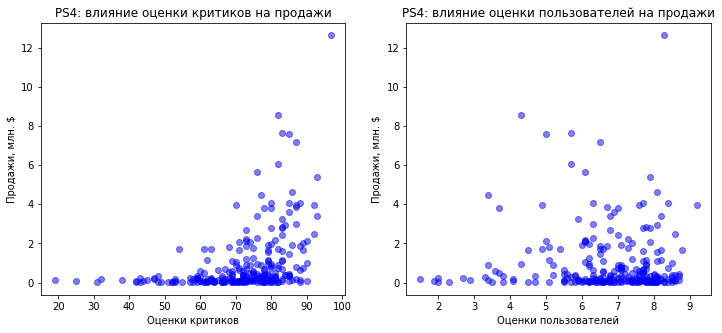

In [44]:
# ПЛАТФОРМА PS4

# делаем срез данных по названию платформы, отфильтровываем значения по critic_score и user_score 
df_ps4 = df_popular_pl.query('platform == "PS4" and critic_score >= 0 and user_score >= 0')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=df_ps4['critic_score'],
            y=df_ps4['total_sales'],
            alpha=0.5,
            color='blue');
ax1.set_title('PS4: влияние оценки критиков на продажи')
ax1.set_xlabel('Оценки критиков')
ax1.set_ylabel('Продажи, млн. $')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=df_ps4['user_score'],
            y=df_ps4['total_sales'],
            alpha=0.5,
            color='blue');
ax2.set_title('PS4: влияние оценки пользователей на продажи')
ax2.set_xlabel('Оценки пользователей')
ax2.set_ylabel('Продажи, млн. $')

plt.show()

In [45]:
# рассчет коэффициента корреляции между отзывами и продажами (платформа PS4)
print('Корреляция между отзывами критиков и продажами (PS4):', df_ps4['critic_score'].corr(df_ps4['total_sales']))
print('Корреляция между отзывами пользователей и продажами (PS4):', df_ps4['user_score'].corr(df_ps4['total_sales']))

Корреляция между отзывами критиков и продажами (PS4): 0.40589480145836687
Корреляция между отзывами пользователей и продажами (PS4): -0.03362497596528878


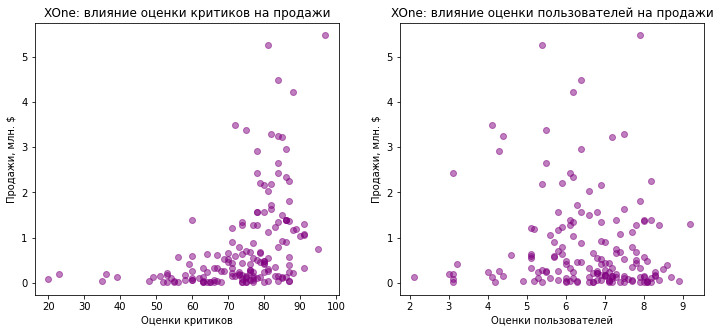

In [46]:
# ПЛАТФОРМА XOne

# делаем срез данных по названию платформы, отфильтровываем значения по critic_score и user_score 
df_xone = df_popular_pl.query('platform == "XOne" and critic_score >= 0 and user_score >= 0')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=df_xone['critic_score'],
            y=df_xone['total_sales'],
            alpha=0.5,
            color='purple');
ax1.set_title('XOne: влияние оценки критиков на продажи')
ax1.set_xlabel('Оценки критиков')
ax1.set_ylabel('Продажи, млн. $')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=df_xone['user_score'],
            y=df_xone['total_sales'],
            alpha=0.5,
            color='purple');
ax2.set_title('XOne: влияние оценки пользователей на продажи')
ax2.set_xlabel('Оценки пользователей')
ax2.set_ylabel('Продажи, млн. $')

plt.show()

In [47]:
# рассчет коэффициента корреляции между отзывами и продажами (платформа XOne)
print('Корреляция между отзывами критиков и продажами (XOne):', df_xone['critic_score'].corr(df_xone['total_sales']))
print('Корреляция между отзывами пользователей и продажами (XOne):', df_xone['user_score'].corr(df_xone['total_sales']))

Корреляция между отзывами критиков и продажами (XOne): 0.41042203561296375
Корреляция между отзывами пользователей и продажами (XOne): -0.09400318326920852


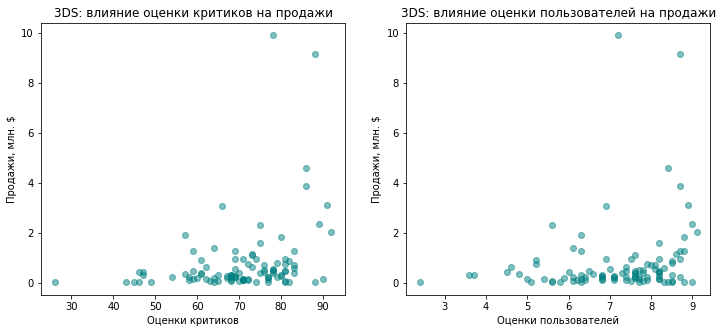

In [48]:
# ПЛАТФОРМА 3DS

# делаем срез данных по названию платформы, отфильтровываем значения по critic_score и user_score 
df_3ds = df_popular_pl.query('platform == "3DS" and critic_score >= 0 and user_score >= 0')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=df_3ds['critic_score'],
            y=df_3ds['total_sales'],
            alpha=0.5,
            color='teal');
ax1.set_title('3DS: влияние оценки критиков на продажи')
ax1.set_xlabel('Оценки критиков')
ax1.set_ylabel('Продажи, млн. $')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=df_3ds['user_score'],
            y=df_3ds['total_sales'],
            alpha=0.5,
            color='teal');
ax2.set_title('3DS: влияние оценки пользователей на продажи')
ax2.set_xlabel('Оценки пользователей')
ax2.set_ylabel('Продажи, млн. $')

plt.show()

In [49]:
# рассчет коэффициента корреляции между отзывами и продажами (платформа 3DS)
print('Корреляция между отзывами критиков и продажами (3DS):', df_3ds['critic_score'].corr(df_3ds['total_sales']))
print('Корреляция между отзывами пользователей и продажами (3DS):', df_3ds['user_score'].corr(df_3ds['total_sales']))

Корреляция между отзывами критиков и продажами (3DS): 0.31055301915326294
Корреляция между отзывами пользователей и продажами (3DS): 0.20181255007655283


По всем трем игровым платформам видим, что корреляция между отзывами критиков и продажами достаточно слабая (по 0,41 у PS4 и XOne; 0,31 - 3DS). Корреляция между отзывами пользователей и продажами еще ниже. У PS4 и XOne корреляция почти равна нулю, у 3DS - 0,2. 

**Распределение игр по жанрам. Выделение жанров с самыми высокими и с самыми низкими продажами.**

In [50]:
df_genre_range = df_popular_pl.groupby('genre', as_index=False)['total_sales'].\
sum().sort_values(by='total_sales', ascending=False)

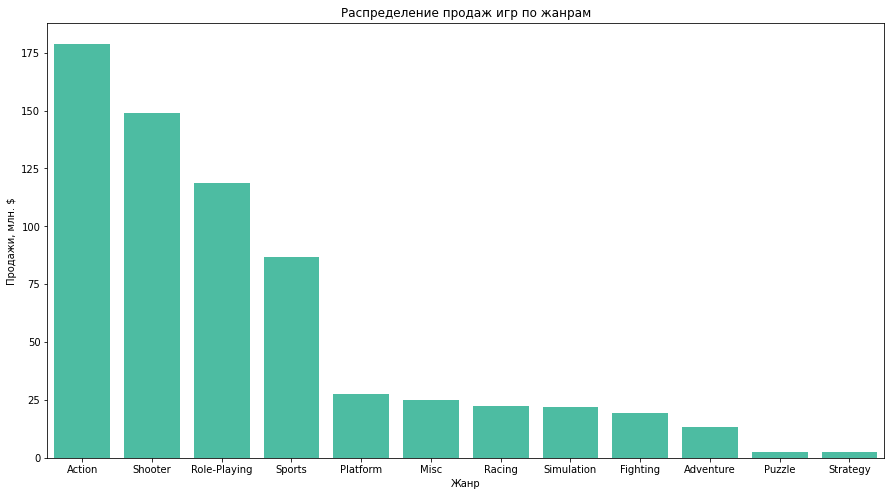

In [51]:
# построение графика распределения продаж игр по жанрам
plt.figure(figsize=(15, 8))

ax = sns.barplot(x='genre', y='total_sales', data=df_genre_range, color='#3acfac')

ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи, млн. $')
plt.title('Распределение продаж игр по жанрам')

plt.show()

In [52]:
df_popular_pl.query('genre == "Strategy"')['total_sales'].sum()

2.3099999999999996

По общей сумме продаж самые прибыльные жанры: Action, Shooter и Role-Playing. К жанрам, которые принесли наименьшую прибыль можно отнести Puzzle и Strategy. Если в жанре Action c 2012 по 2016 годы общая сумма продаж составила более 175 млн. долларов, то игры в жанре Strategy принесли всего лишь 2,3 млн. долларов.

Но на общие продажи могли повлиять многочисленные выбросы (их мы видели выше при построении графика boxplot). Чтобы понять сохранится ли такое же рапределение популярности жанров для большинства игр, сделаем расчет среднего и медианного значений.


In [53]:
# расчет медианного значения продаж игр популярных платформ с группировкой по жанрам
df_median = df_popular_pl.groupby('genre')['total_sales'].median()
df_median.sort_values(ascending=False)

genre
Shooter         0.970
Sports          0.345
Racing          0.235
Platform        0.225
Role-Playing    0.215
Fighting        0.155
Misc            0.150
Simulation      0.140
Action          0.130
Puzzle          0.085
Strategy        0.075
Adventure       0.070
Name: total_sales, dtype: float64

In [54]:
# расчет среднего значения продаж игр популярных платформ с группировкой по жанрам
df_mean =  df_popular_pl.groupby('genre')['total_sales'].mean()
df_mean.sort_values(ascending=False)

genre
Shooter         1.839753
Sports          0.901875
Role-Playing    0.825278
Platform        0.770278
Simulation      0.728333
Fighting        0.575294
Racing          0.555250
Action          0.464675
Misc            0.313375
Puzzle          0.191429
Adventure       0.177600
Strategy        0.115500
Name: total_sales, dtype: float64

Проведенные расчеты показали совсем другую картину. Жанр Action, который лидирует по общей сумме продаж, сдвинулся ближе к концу списка. По среднему и медианному значениям продаж однозначно лидируют игры в жанрах Shooter и Sports. А вот аутсайдеры остались те же (Puzzle, Adventure и Strategy). Из полученных данных можно сделать вывод, что в жанре Action вышло несколько игр-хитов, которые принесли высокие сборы, но в целом, этот жанр считать самым популярным нельзя, т.к. стабильные продажи идут гораздо лучше у игр в жанрах Shooter и Sports.

При проведении исследовательского анализа данных было определено общее количество игр, выпускаемых в разные годы. Половина из представленных игр была выпущена с 2007 по 2016 годы.

Был определен жизненный цикл популярности игровых платформ. В большинстве случаев он составляет примерно 6 лет.

Определены три наиболее актуальные платформы на данный момент: PS3, XOne, 3DS. 

Посчитана корреляция между оценками критиков и оценками пользователей. Оценки критиков слабо коррелируют с продажами, а корреляция оценок пользователй с продажами практически нулевая.

Также было отмечено, что большую часть общей выручки генерирует незначительное количество игр-хитов.

Найдены наиболее популярные жанры игр за последние 5 лет (Action, Shooter и Role-Playing).

## Портрет пользователя каждого региона

**Определим самые популярные игровые платформы в регионах: Северная Америка (NA), Европа (EU) и Япония (JP)**

In [55]:
df_sort_years = df.query('year_of_release >= 2012').reset_index(drop=True)

In [56]:
platform_region = df_sort_years[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)

In [57]:
platform_region.head(10)

,platform,variable,value
15,PS4,eu_sales,141.09
9,X360,na_sales,140.05
4,PS4,na_sales,108.74
14,PS3,eu_sales,106.86
3,PS3,na_sales,103.38
10,XOne,na_sales,93.12
22,3DS,jp_sales,87.79
20,X360,eu_sales,74.52
0,3DS,na_sales,55.31
21,XOne,eu_sales,51.59


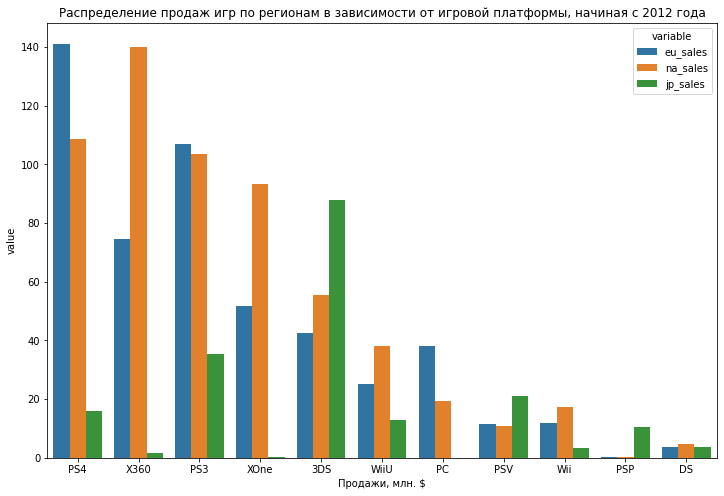

In [58]:
# строим график рапределения продаж игр по регионам в зависимости от игровой платформы
plt.figure(figsize=(12, 8))

ax = sns.barplot(x=platform_region['platform'],
                 y=platform_region['value'],
                 hue=platform_region['variable'])

plt.xlabel('Продажи, млн. $')
plt.title('Распределение продаж игр по регионам в зависимости от игровой платформы, начиная с 2012 года')

plt.show()

Из полученного графика выделим топ-5 платформ:

1. PS4
2. X360
3. PS3
4. XOne
5. 3DS

Платформы, занимающие первые четыре места популярны в Северной Америке и Европе, а вот в Японии игры на этих платформах покупают очень мало. Зато 3DS, напротив, лидер продаж в Японии, а вот в Европе и Америке продажи игр на этой платформе существенно ниже. 

**Определим самые популярные жанры в регионах: Северная Америка (NA), Европа (EU) и Япония (JP)**

In [59]:
genre_region = df_sort_years[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

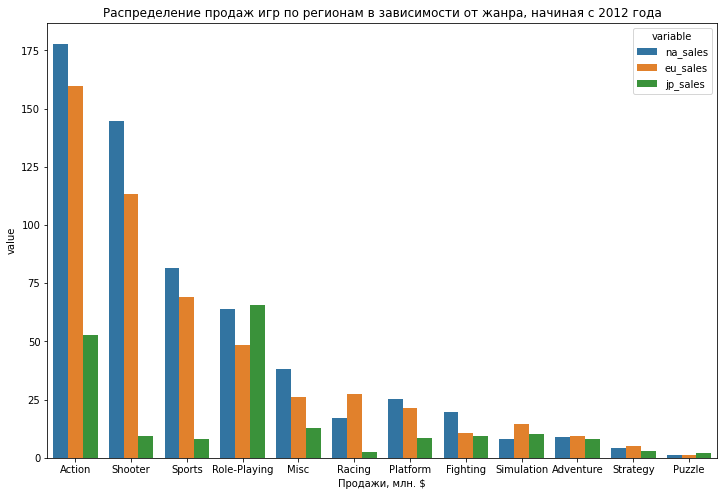

In [60]:
# строим график рапределения продаж игр по регионам в зависимости от жанра
plt.figure(figsize=(12, 8))

ax = sns.barplot(x=genre_region['genre'],
                 y=genre_region['value'],
                 hue=genre_region['variable'])

plt.xlabel('Продажи, млн. $')
plt.title('Распределение продаж игр по регионам в зависимости от жанра, начиная с 2012 года')

plt.show()

Топ-5 самых популярных жанров игр:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Видно, что пользователи из Северной Америки и Европы не только платформы предпочитают одни и те же, но и имеют схожие вкусовые предпочтения в игровых жанрах. Action и Shooter - явные лидеры. В Японии также много продаж игр в жанре Action, но лидерует в этой стране жанр Role-Playing.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

In [61]:
rating_region = df_sort_years[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

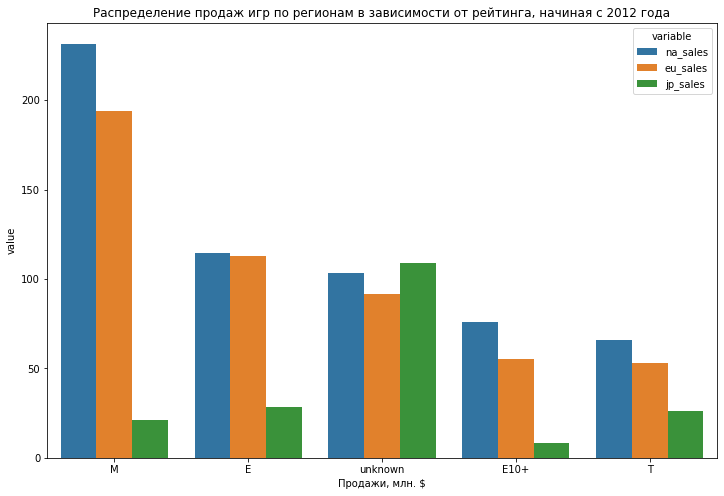

In [62]:
# строим график рапределения продаж игр по регионам в зависимости от рейтинга
plt.figure(figsize=(12, 8))

ax = sns.barplot(x=rating_region['rating'],
                 y=rating_region['value'],
                 hue=rating_region['variable'])

plt.xlabel('Продажи, млн. $')
plt.title('Распределение продаж игр по регионам в зависимости от рейтинга, начиная с 2012 года')

plt.show()

В Европе и Северной Америке было продано наибольшее количество игр из категории "М" (для взрослых). В Японии самый большой процент продаж с 'unknown'. 
В мире есть 15 официальных организаций, которые определяют, каким возрастным категориям подходит игра. ЕSRB была образована американской ассоциацией производителей компьютерных игр и ПО в 1994 году и, по мнению Федеральной Торговой Комиссии, является самой сильной саморегулируемой организацией в сфере развлечений. Тем не менее ЕSRB - далеко не единственная, и работает в основном в США, Канаде и Мексике. В Японии есть своя организация, которая проводит классификацию игр - это Computer Entertainment Rating Organization (CERO). Мы анализируем данные, в которых присутствует только классификация от ЕSRB, поэтому пропуски в столбце rating вполне объяснимы, особенно по записям, относящимся к Японии.


В результате проведенного анализа можно сделать вывод о том, что портреты пользователей из Европы и Северной Америки схожи, а вот азиатские пользователи отличаются своими вкусовыми предпочтениями. При планировании рекламных кампаний в этих регионах стоит учитывать выявленные различия.

## Проверка гипотез

**Гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [63]:
df_xone = df.query('platform == "XOne" & year_of_release >= 2012 & user_score >= 0')['user_score']
df_pc = df.query('platform == "PC" & year_of_release >= 2012 & user_score >= 0')['user_score']

# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

alpha = .05 

results = st.ttest_ind(
    df_xone, 
    df_pc)

print('p-значение:', results.pvalue)

# сравниваем получившееся p-значение с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5970211251516373
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось. Следовательно, у нас есть основание предполагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные**

In [64]:
df_action = df.query('genre == "Action" & year_of_release >= 2012 & user_score >= 0')['user_score']
df_sports = df.query('genre == "Sports" & year_of_release >= 2012 & user_score >= 0')['user_score']

# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

alpha = .05 

results = st.ttest_ind(
    df_action, 
    df_sports)

print('p-значение:', results.pvalue)

# сравниваем получившееся p-значение с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8733525657180856e-26
Отвергаем нулевую гипотезу


В данном случае мы отвергаем нулевую гипотезу. Следовательно, у нас есть основания полагать, что средние пользовательские рейтинги жанров Action и Sport различаются.

## Общий вывод

В данном проекте был проведен анализ рынка компьютерных игр на основе данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Данные взяты из открытых источников.

Цели проведения анализа данных:

- Выявление закономерностей, определяющих успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


- Проверка гипотез:

  Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  
  Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  

В результате исследования данных, были выявлены следующие особенности и закономерности:

- Половина из представленных игр была выпущена с 2007 по 2016 годы;

- Пик всех продаж пришелся на 2008-2009 гг., в настоящее время наблюдается спад;

- Наиболее перспективными из актуальных на сегодняшний день платформ являются PS4, XOne и DS3;

- Самыми популярными жанрами игр за последние пять лет являются Sports и Shooter, но по общей сумме продаж в этот временной период лидирует Action;

- Большую часть общей выручки генерирует несколько игр-хитов;

- Портреты пользователей из Европы и Северной Америки схожи, а вот азиатские пользователи отличаются своими вкусовыми предпочтениями и по жанрам, и по платформам; 

- Влияние оценок критиков и пользователей на динамику продаж несущественное (в обоих случаях наблюдается слабая корреляция)

В результате проверки гипотез мы установили:

**Гипотеза 1 подтверждена:**

На основе проведенного анализа у нас есть основание предполагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотеза 2 не подтверждена:**
  
Полученные результаты дают основание полагать, что средние пользовательские рейтинги жанров Action и Sport различаются.

**Рекомендации:**

Планируя рекламную кампанию, необходимо учитывать, в каком регионе находится магазин. Пользователи из Северной Америки и Европы выберут игры на платформах PS4, X360 и XOne, азиатам же лучше предлагать игры на базе местной платформы 3DS;

Делать ставку прежде всего на игры в жанре Sports и Shooter.